In [1]:
import numpy as np
from numpy.random import randn
from scipy.stats import norm     # normal cdf

import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.api import ARIMA, ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from sklearn import datasets

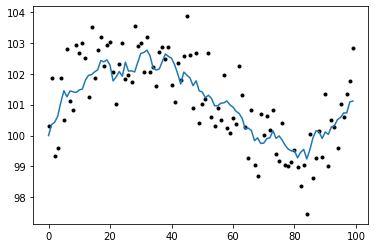

In [2]:
# Generate synthetic data
np.random.seed(0)
n = 100
a  = np.zeros(n) # create an array of 0's of length n
s = .2            # controls how fast true mean moves
a[0] = 100
for i in range(1,n):
    a[i] = a[i-1] + s*randn()
noise_std = .8
x = a + noise_std*randn(n)

plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)


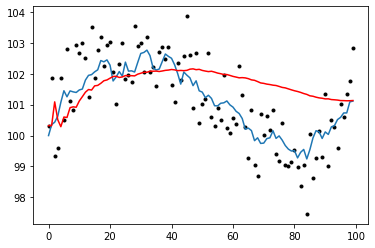

In [3]:
# fit a constant mean model 
ahat = np.zeros(len(x))
ahat[0] = x[0]
for i in range(1,n):
    ahat[i] = ahat[i-1] + 1/i*(x[i-1] - ahat[i-1])
    
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), ahat, color='red')

- Change noise std and s and see how it affects x.
- Change the alpha parameter to see how it affects the red line, and to make the red line track x.
- Remove the arguments to fit() to let SimpleExpSmoothing fit alpha for you.
- How does the optimal value of alpha change as you change noise std and s?

## ARIMA

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                    ARMA(10, 0)   Log Likelihood                -132.904
Method:                       css-mle   S.D. of innovations              0.907
Date:                Tue, 21 Sep 2021   AIC                            289.809
Time:                        10:54:34   BIC                            321.071
Sample:                             0   HQIC                           302.461
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.1878      0.630    160.489      0.000      99.952     102.424
ar.L1.y        0.2667      0.101      2.632      0.008       0.068       0.465
ar.L2.y        0.2209      0.106      2.089      0.0

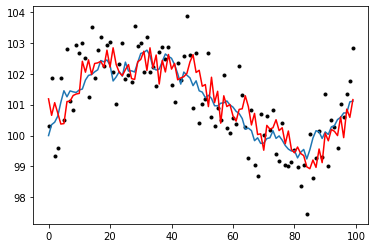

In [4]:
# fit an autoregressive model
lag_order = 10 # choose the number of lagged observations
fit = ARIMA(x, order = (lag_order, 0, 0)).fit()
xhat = fit.fittedvalues
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
print(fit.summary())

- Change lag_order and see how it affects the model.
- What happens if lag-order is small?
- What happens if lag-order is large?

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 5)   Log Likelihood                -142.191
Method:                       css-mle   S.D. of innovations              0.999
Date:                Tue, 21 Sep 2021   AIC                            298.382
Time:                        10:54:35   BIC                            316.618
Sample:                             0   HQIC                           305.763
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.1843      0.261    387.775      0.000     100.673     101.696
ma.L1.y        0.3684      0.104      3.546      0.000       0.165       0.572
ma.L2.y        0.4078      0.107      3.827      0.0

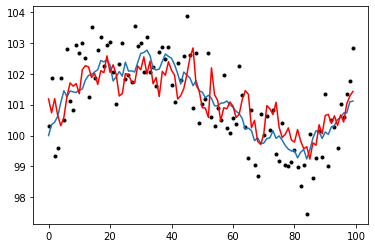

In [5]:
# fit a moving average model
order_ma = 5 # choose the size of the moving average window
fit = ARIMA(x, order = (0, 0, order_ma)).fit()
xhat = fit.fittedvalues
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
print(fit.summary())

- Change order_ma and see how it affects the model.
- What happens if order_ma is small?
- What happens if order_ma is large?

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 5)   Log Likelihood                -133.522
Method:                       css-mle   S.D. of innovations              0.913
Date:                Tue, 21 Sep 2021   AIC                            285.045
Time:                        10:54:35   BIC                            308.491
Sample:                             0   HQIC                           294.534
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.1806      0.622    162.559      0.000      99.961     102.401
ar.L1.y        0.7941      0.446      1.779      0.075      -0.081       1.669
ar.L2.y        0.1390      0.431      0.323      0.7

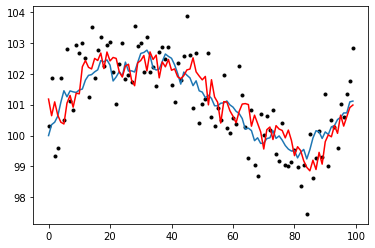

In [6]:
# fit an ARMA model
lag_order = 2 # choose the number of lagged observations
order_ma = 5 # choose the size of the moving average window
fit = ARIMA(x, order = (lag_order, 0, order_ma)).fit()
xhat = fit.fittedvalues
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
print(fit.summary())

- Change both lag_order and order_ma and see how they affects the model.
- When do we choose small values of lag_order and order_ma?
- When do we choose large values of lag_order and order_ma?

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA an

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   99
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -135.508
Method:                       css-mle   S.D. of innovations              0.948
Date:                Tue, 21 Sep 2021   AIC                            281.015
Time:                        10:54:36   BIC                            293.991
Sample:                             1   HQIC                           286.265
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.034      0.346      0.729      -0.056       0.079
ar.L1.D.y     -0.2005      0.216     -0.930      0.352      -0.623       0.222
ar.L2.D.y     -0.0459      0.166     -0.276      0.7

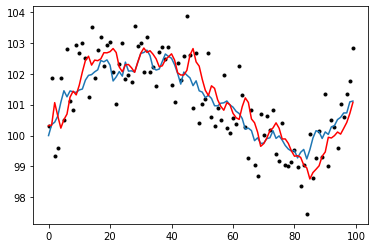

In [7]:
# fit an ARIMA model
lag_order = 2 # choose the number of lagged observations
order_ma = 1 # choose the size of the moving average window
deg_diff = 1 # choose the degree of difference
fit = ARIMA(x, order = (lag_order, deg_diff, order_ma)).fit()
xhat = fit.predict(deg_diff,n-1, typ="levels")
xhat = np.concatenate((x[0:deg_diff], xhat), axis=0)
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
print(fit.summary())

- Change both lag_order, order_ma and deg_diff, and see how they affects the model.
- When do we choose small values of lag_order, order_ma and deg_diff?
- When do we choose large values of lag_order and order_ma and deg_diff?

## Simple exponential smoothing

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  100
Model:             SimpleExpSmoothing   SSE                             90.259
Optimized:                       True   AIC                             -6.249
Trend:                           None   BIC                             -1.039
Seasonal:                        None   AICC                            -5.828
Seasonal Periods:                None   Date:                 Tue, 21 Sep 2021
Box-Cox:                        False   Time:                         10:54:36
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3130337                alpha                 True
initial_level              100.74222                

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


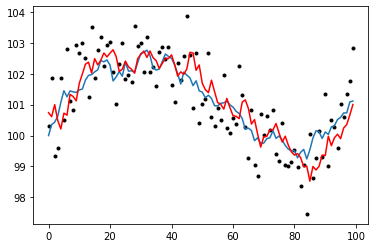

In [8]:
# fit a simple exponential smoothing
fit = SimpleExpSmoothing(x).fit() # choose smoothing level to best fit data
xhat = fit.fittedvalues
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
print(fit.summary())

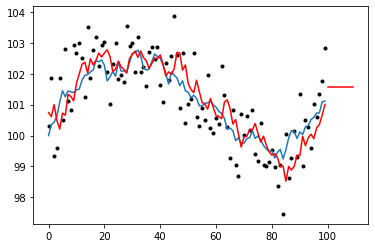

In [9]:
# forecast, too!
xhat = fit.fittedvalues
l = 10
forecast = fit.forecast(l)

# plot with forecast
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
plt.plot(range(n,n+l), forecast, color='red')

## Holt-Winters

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


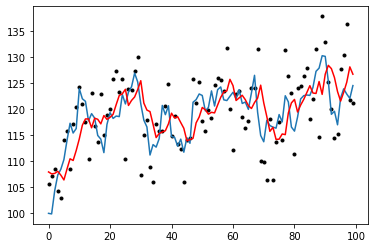

In [10]:
n = 100
a = np.zeros(n)
b = np.zeros(n)
a[0] = 100 # initial level
b[0] = 1 # initial trend

for i in range(1,n):
    b[i] = b[i-1] + 0.1*randn()      # trend changes slowly
    a[i] = a[i-1] + b[i-1] + 3*randn() # level moves with the trend + extra random movement

# We observe the level + extra noise
x = a + 5*randn(n) 

# fit the model
fit = Holt(x).fit() # optimize over the parameters
xhat = fit.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

In [11]:
fit.params

{'smoothing_level': 0.2466802816650264,
 'smoothing_trend': 2.086305206173146e-11,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 107.7645431781799,
 'initial_trend': 0.1755766872111048,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Suppose I change the code to set initial value of trend b[0] = -1. What will happen?

- (up) The blue line will trend downward
(down) The blue line will trend upward more quickly
- (yes) The blue line will stay at 0
- (no) The blue line will bounce around more
- (coffee) The black dots will be further away from the black line.

Suppose I change 0.8 to 5 in defining the observations x = a + 0.8*randn(n). What will happen?

- (up) The blue line will trend downward
- (down) The blue line will trend upward more quickly
- (yes) The blue line will stay at 0
-(no) The blue line will bounce around more
- (coffee) The black dots will be further away from the black line.

Suppose I multiply randn() by 3 in defining the level a[i] = a[i-1] + b[i-1] + randn(). What will happen?

- (up) The blue line will trend downward
- (down) The blue line will trend upward more quickly
- (yes) The blue line will stay at 0
- (no) The blue line will bounce around more
- (coffee) The black dots will be further away from the black line.

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


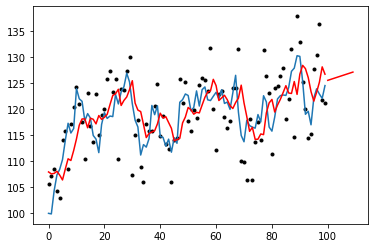

In [12]:
# fit 
fit = Holt(x).fit()
xhat = fit.fittedvalues

# forecast, too!
xhat = fit.fittedvalues
l = 10 # how far out to forecast
forecast = fit.forecast(l)

# plot with forecast
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')
plt.plot(range(n,n+l), forecast, color='red')

## Holt-Winters: Add seasonality, too!

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.27364084345555184, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 108.06544820127112, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


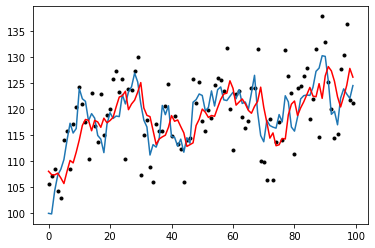

In [13]:
# call method with just a timeseries 
# -> fits a model with just a level (no slope or seasonality) 
# -> learns the smoothing_level parameter
model = ExponentialSmoothing(x).fit()
print(model.params)

# fit the model
xhat = model.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

{'smoothing_level': 0.2, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 109.40988600469268, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


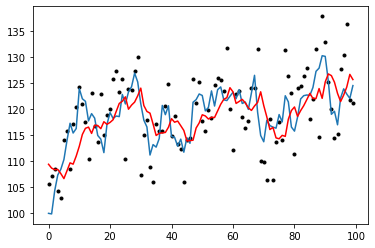

In [14]:
# you can control the smoothing_level parameter yourself if you prefer
model = ExponentialSmoothing(x).fit(smoothing_level=0.2)
print(model.params)

# fit the model
xhat = model.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

{'smoothing_level': 0.2466802816650264, 'smoothing_trend': 2.086305206173146e-11, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 107.7645431781799, 'initial_trend': 0.1755766872111048, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


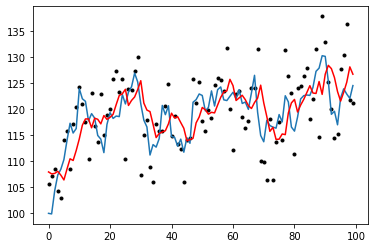

In [15]:
# can also add an (additive or multiplicative) trend 
model = ExponentialSmoothing(x, trend='add').fit()
print(model.params)

# fit the model
xhat = model.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

{'smoothing_level': 0.2, 'smoothing_trend': 0.5, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 109.40988600469268, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-16-e883bc6395a4>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model = ExponentialSmoothing(x).fit(smoothing_level=0.2,smoothing_slope=.5)


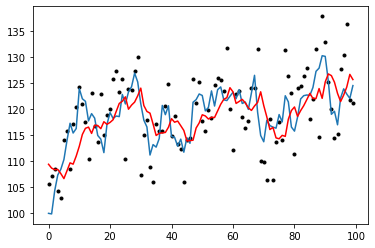

In [16]:
# you can control the smoothing_level and smoothing_slope parameters yourself if you prefer
model = ExponentialSmoothing(x).fit(smoothing_level=0.2,smoothing_slope=.5) 
print(model.params)

# fit the model
xhat = model.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.29601710722264535, 'smoothing_trend': 4.5208293653395143e-07, 'smoothing_seasonal': 2.3292676802987167e-06, 'damping_trend': nan, 'initial_level': 89.87452745894998, 'initial_trend': 0.15128740940000543, 'initial_seasons': array([1.20008475, 1.17551003, 1.19635276, 1.19471508, 1.16187069,
       1.24352944, 1.20119376, 1.19290844, 1.18699105, 1.17194561,
       1.18788131, 1.20241098]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


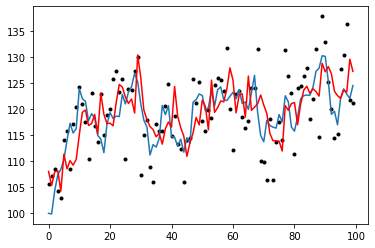

In [17]:
# can add a trend and seasonality
model = ExponentialSmoothing(x, trend='add', seasonal='mul', seasonal_periods=12).fit()
print(model.params)

# fit the model
xhat = model.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')

{'smoothing_level': 0.2022349125298961, 'smoothing_trend': 7.678140958075732e-13, 'smoothing_seasonal': 0.5, 'damping_trend': nan, 'initial_level': 115.27146762306845, 'initial_trend': 0.16268983684966515, 'initial_seasons': array([0.93264804, 0.9054427 , 0.95219347, 0.91269931, 0.88434003,
       0.94336123, 0.9026357 , 0.88317788, 0.91919167, 0.94080891,
       0.96999826, 0.9654558 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/felicityj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


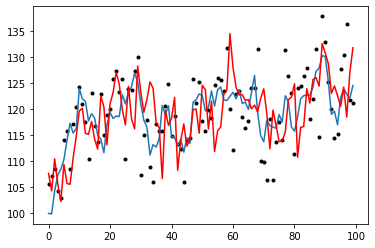

In [18]:
# can control parameters explicitly
# -> can control some parameters and optimize over others
model = ExponentialSmoothing(x, trend='add', seasonal='mul', seasonal_periods=12).fit(smoothing_seasonal=.5)
print(model.params)

# fit the model
xhat = model.fittedvalues

# plot
plt.scatter(range(n), x, marker='.', color='black')
p = plt.plot(a)
plt.plot(range(n), xhat, color='red')